You are given the root of a binary tree with n nodes. Each node is uniquely assigned a value from 1 to n. You are also given an integer startValue representing the value of the start node s, and a different integer destValue representing the value of the destination node t.

Find the shortest path starting from node s and ending at node t. Generate step-by-step directions of such path as a string consisting of only the uppercase letters 'L', 'R', and 'U'. Each letter indicates a specific direction:

    'L' means to go from a node to its left child node.
    'R' means to go from a node to its right child node.
    'U' means to go from a node to its parent node.

Return the step-by-step directions of the shortest path from node s to node t.

 

Example 1:

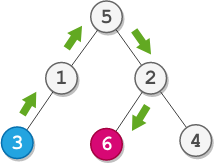

Input: root = [5,1,2,3,null,6,4], startValue = 3, destValue = 6
Output: "UURL"
Explanation: The shortest path is: 3 → 1 → 5 → 2 → 6.

Example 2:

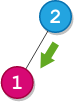

Input: root = [2,1], startValue = 2, destValue = 1
Output: "L"
Explanation: The shortest path is: 2 → 1.

 

Constraints:

    The number of nodes in the tree is n.
    2 <= n <= 105
    1 <= Node.val <= n
    All the values in the tree are unique.
    1 <= startValue, destValue <= n
    startValue != destValue



In [ ]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def getDirections(self, root: Optional[TreeNode], startValue: int, destValue: int) -> str:
        startpath = []
        destpath = []
        def dfs(node, target, path):
            if node.val == target:
                return True
            if node.left:
                path.append("L")
                if dfs(node.left, target, path):
                    return True
                path.pop()
            if node.right:
                path.append("R")
                if dfs(node.right, target, path):
                    return True
                path.pop()
            return False

        dfs(root, startValue, startpath)
        dfs(root, destValue, destpath)

        startpath = "".join(startpath)
        destpath = "".join(destpath)

        common_anchestor = 0
        for i in range(min(len(startpath), len(destpath))):
            if startpath[i] != destpath[i]:
                common_anchestor = i
                break
        if startpath.startswith(destpath):
            common_anchestor = len(destpath)
        if destpath.startswith(startpath):
            common_anchestor = len(startpath)
        
        
        return "U" * len(startpath[common_anchestor:]) + destpath[common_anchestor:]
    